**Worksheet 2**

Add the files from this Link to work with the code First and in google collab folders for file access in code: https://drive.google.com/drive/folders/1TzHyWjS-wJ6hAdF1QGKO_jm7Zi0rzmRv?usp=sharing

1. Consider the impulse response of a Hallway to simulate the acoustic environ-
ment.

Inputs
• Recorded audio data
• impulse response of hallway ”hallway imp.wav”
All the signals are sampled at 16 khz.

**Load Libraries**

In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

**Select Paramters and Load Audio Data**

In [4]:
# Starting index of input and impulse response
Ix = 0
Ih = 0

# File names for the input and impulse response
file_name_x = 'mono_ece2021050.wav'
file_name_h = 'hallway_imp.wav'

# Read the input and impulse response from the files
Fsx, x = read(file_name_x)
Fsh, h = read(file_name_h)

# Check if the input is stereo or mono and print accordingly
if len(x.shape) == 2:
    print('[=] Stereo Channel !!')
elif len(x.shape) == 1:
    print('[=] Mono Channel !!')
print(type(x))

# Set the interval for downsampling the input and impulse response
N = 1000 #change the value of N based no of smaples points you need but more sample points will take more time to process 500 to 2000 is descent for looking
interval = max(len(x) // N, 1)
x = x[::interval]
h = h[::interval]

# Cast to np.float64 to handle overflow
x = x.astype(np.float64)
h = h.astype(np.float64)

# Length of the input and impulse response
Lx = len(x)
Lh = len(h)

print('size of input response : {}'.format(Lx))
print('size of impulse response : {}'.format(Lh))

# Calculate the starting index and length of the output response
Iy = Ix + Ih
Ly = Lx + Lh - 1


[=] Mono Channel !!
<class 'numpy.ndarray'>
size of input response : 1014
size of impulse response : 1163


**Linear Convolution**

In [5]:

# Initialize the output response array
y = np.zeros(Ly, dtype=np.float64)

# Convolution to calculate the output response
for i in range(Lx):
    for j in range(Lh):
        y[i + j] += x[i] * h[j]


**Plotting Section**

input sequence : [ -330.  -287.  1937. ... -2465. -1818.   212.]
IR sequence : [ 4. -2. -2. ...  4.  9.  5.]
Output sequence : [ -1320.   -488.   8982. ... -27839.  -7182.   1060.]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

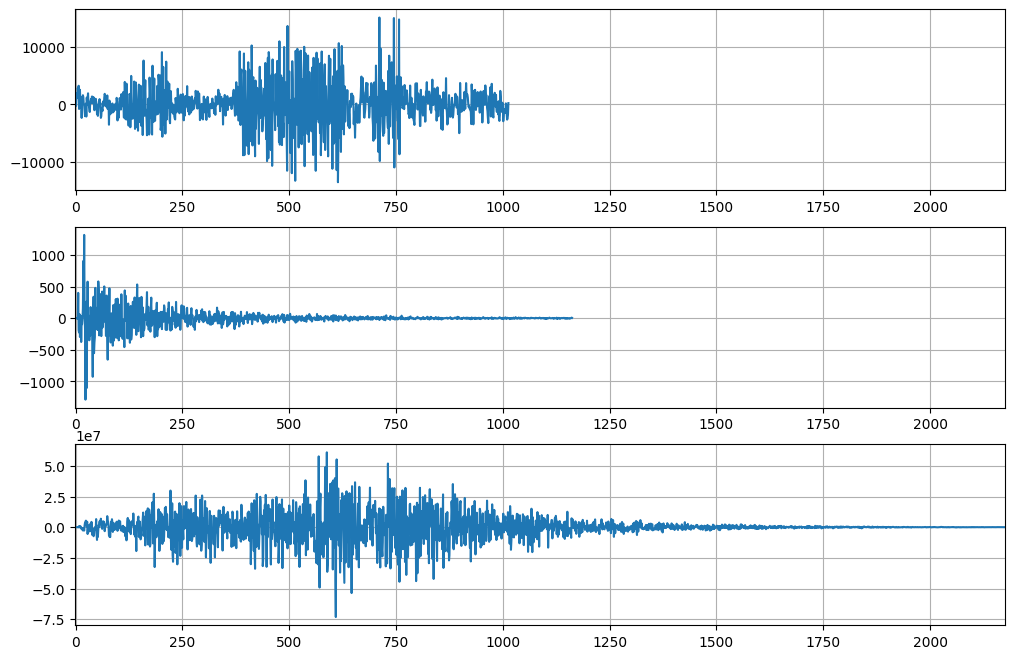

In [6]:

# Print input, impulse response, and output sequence
print("input sequence : {}".format(x))
print("IR sequence : {}".format(h))
print("Output sequence : {}".format(y))

# Create arrays for plotting
nx = np.arange(Ix, Ix + Lx)  # Bringing all the responses to equal sampling distance
nh = np.arange(Ih, Ih + Lh)
ny = np.arange(Iy, Iy + Ly)

# Plot the input, impulse response, and output sequence
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(nx, x)
plt.xlim([min(ny) - 1, max(ny) + 1])  # Setting the limit for x-axis
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(nh, h)
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ny, y)
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

plt.tight_layout


2. Find the system output considering the following pair of signals and interpret
the results. Also plot all sets of signals.

(a) x[n] = [1, −2, 3, −4, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5] and h[n] = [1, 1, 1, 1]

**Select Parameters**

In [7]:
# Define the input sequence xn
xn = np.array([1, -2, 3, -4, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5])
# Get the size (length) of the input sequence
lx = xn.size

# Define the initial index for the input sequence
ix = -1

# Define the impulse response hn
hn = np.array([1, 1, 1, 1])

# Get the size (length) of the impulse response
lh = hn.size

# Define the initial index for the impulse response
ih = -1

# Calculate the length of the output sequence
ly = lx + lh - 1

# Calculate the initial index for the output sequence
iy = ix + ih



**Linear Concolution**

In [8]:

# Initialize an array to store the output sequence
yn = np.zeros(ly)

# Perform linear convolution using nested loops
for i in range(lx):
    for j in range(lh):
        # Accumulate the convolution result at the appropriate index
        yn[i + j] += (xn[i] * hn[j])

# Print the input, impulse response, and output sequences
print("Input = ", xn)
print("Impulse response = ", hn)
print("Output = ", yn)

# Create arrays for the indices of the input, impulse response, and output sequences
nx = np.arange(ix, ix + lx)
nh = np.arange(ih, ih + lh)
ny = np.arange(iy, iy + ly)


Input =  [ 1 -2  3 -4  5  0  5  0  5  0  5  0  5  0  5  0  5  0  5]
Impulse response =  [1 1 1 1]
Output =  [ 1. -1.  2. -2.  2.  4.  6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10.  5.  5.]


**Plot Section**

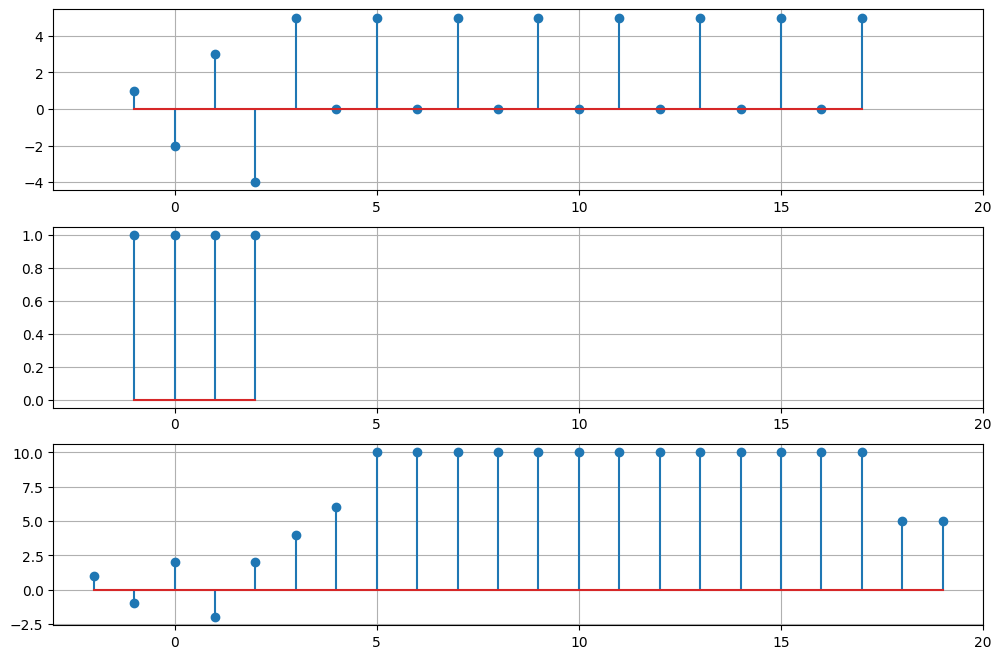

In [9]:

# Create a figure for plotting with specified dimensions
plt.figure(figsize=(12, 8))

# Plot the input sequence as a stem plot in the first subplot
plt.subplot(3, 1, 1)
plt.stem(nx, xn, label="Input")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Plot the impulse response as a stem plot in the second subplot
plt.subplot(3, 1, 2)
plt.stem(nh, hn, label="Impulse response")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Plot the output sequence as a stem plot in the third subplot
plt.subplot(3, 1, 3)
plt.stem(ny, yn, label="Output")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Display the entire plot
plt.show()

(b) x[n] = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] and h[n] = [1, −1, 1, −1]

**Select Parameters**

In [10]:
# Define the input sequence xn
xn = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
# Get the size (length) of the input sequence
lx = xn.size

# Define the initial index for the input sequence
ix = -1

# Define the impulse response hn
hn = np.array([1, -1, 1, -1])

# Get the size (length) of the impulse response
lh = hn.size

# Define the initial index for the impulse response
ih = -1

# Calculate the length of the output sequence
ly = lx + lh - 1

# Calculate the initial index for the output sequence
iy = ix + ih



**Linear Convolution**

In [11]:

# Initialize an array to store the output sequence
yn = np.zeros(ly)

# Perform linear convolution using nested loops
for i in range(lx):
    for j in range(lh):
        # Accumulate the convolution result at the appropriate index
        yn[i + j] += (xn[i] * hn[j])

# Print the input, impulse response, and output sequences
print("Input = ", xn)
print("Impulse response = ", hn)
print("Output = ", yn)

# Create arrays for the indices of the input, impulse response, and output sequences
nx = np.arange(ix, ix + lx)
nh = np.arange(ih, ih + lh)
ny = np.arange(iy, iy + ly)


Input =  [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Impulse response =  [ 1 -1  1 -1]
Output =  [ 5.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -5.  0. -5.]


**Plot Section**

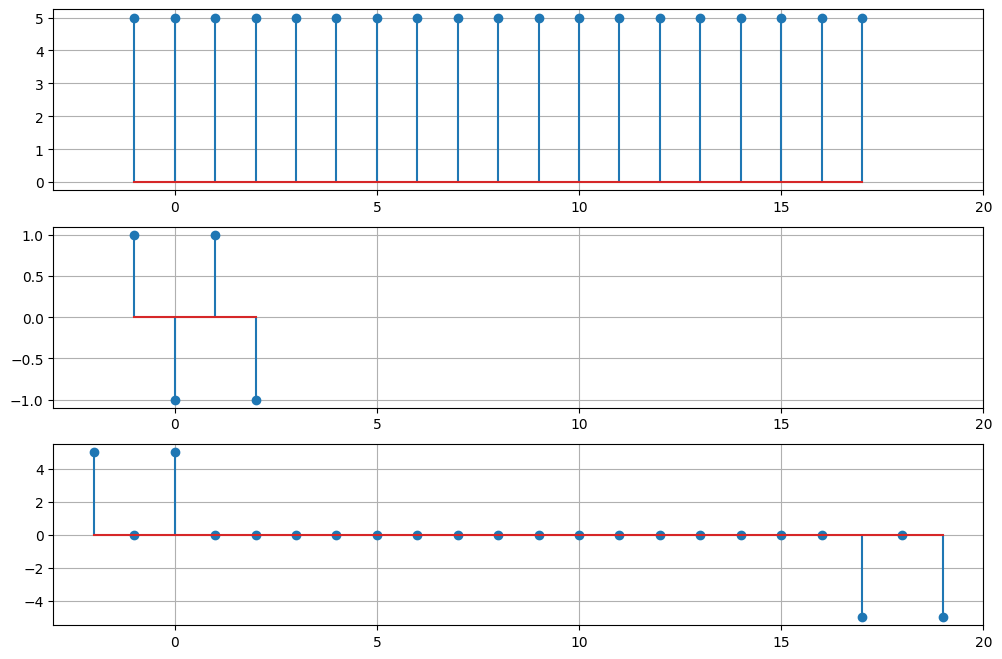

In [12]:

# Create a figure for plotting with specified dimensions
plt.figure(figsize=(12, 8))

# Plot the input sequence as a stem plot in the first subplot
plt.subplot(3, 1, 1)
plt.stem(nx, xn, label="Input")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Plot the impulse response as a stem plot in the second subplot
plt.subplot(3, 1, 2)
plt.stem(nh, hn, label="Impulse response")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Plot the output sequence as a stem plot in the third subplot
plt.subplot(3, 1, 3)
plt.stem(ny, yn, label="Output")
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

# Display the entire plot
plt.show()